<a href="https://colab.research.google.com/github/shreyas269/programming/blob/master/machine_learning/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

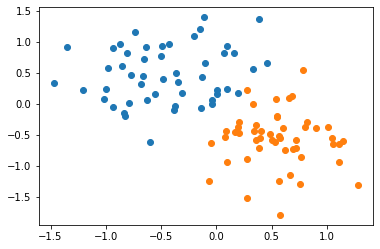

In [0]:
scatter_plot()

In [0]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
      super().__init__() 
      self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
      pred = torch.sigmoid(self.linear(x))
      return pred
    def predict(self, x):
      pred = self.forward(x)
      if pred >= 0.5:
        return 1
      else:
        return 0

In [0]:
torch.manual_seed(52)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3058, 0.4013]], requires_grad=True), Parameter containing:
tensor([0.2633], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

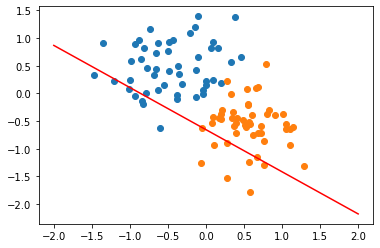

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
epochs = 10000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Streaming output truncated to the last 5000 lines.
epoch: 5001 loss: 0.11860078573226929
epoch: 5002 loss: 0.11858942359685898
epoch: 5003 loss: 0.11857805401086807
epoch: 5004 loss: 0.11856671422719955
epoch: 5005 loss: 0.11855534464120865
epoch: 5006 loss: 0.11854400485754013
epoch: 5007 loss: 0.11853265017271042
epoch: 5008 loss: 0.1185213103890419
epoch: 5009 loss: 0.11850996315479279
epoch: 5010 loss: 0.11849863827228546
epoch: 5011 loss: 0.11848729103803635
epoch: 5012 loss: 0.11847597360610962
epoch: 5013 loss: 0.11846466362476349
epoch: 5014 loss: 0.11845333129167557
epoch: 5015 loss: 0.11844199895858765
epoch: 5016 loss: 0.1184307113289833
epoch: 5017 loss: 0.11841938644647598
epoch: 5018 loss: 0.11840809136629105
epoch: 5019 loss: 0.11839678138494492
epoch: 5020 loss: 0.11838546395301819
epoch: 5021 loss: 0.11837417632341385
epoch: 5022 loss: 0.11836287379264832
epoch: 5023 loss: 0.11835160106420517
epoch: 5024 loss: 0.11834029853343964
epoch: 5025 loss: 0.1183290183544159
ep

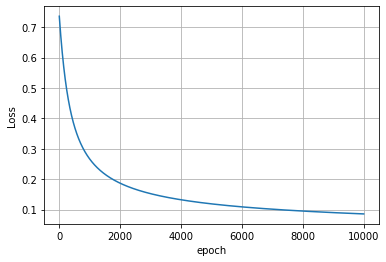

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

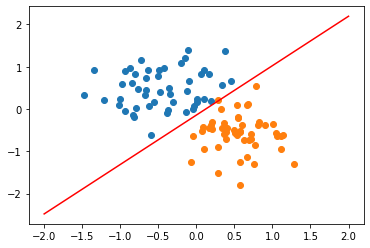

In [0]:
plot_fit("Trained Model")

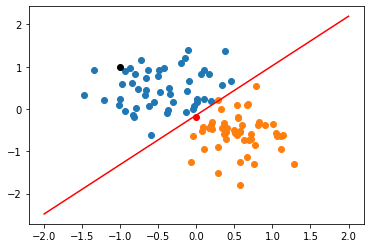

Red point positive probability = 0.5489301085472107
Black point positive probability = 0.00026589722256176174
Red point belongs in class 1
Black point belongs in class = 0


In [0]:
point1 = torch.Tensor([0, -0.2])
point2 = torch.Tensor([-1.0, 1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')
plot_fit("Trained Model")
print("Red point positive probability = {}".format(model.forward(point1).item())) 
print("Black point positive probability = {}".format(model.forward(point2).item())) 
print("Red point belongs in class {}".format(model.predict(point1))) 
print("Black point belongs in class = {}".format(model.predict(point2)))